# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [33]:
# Checking the number of mice.
study_data["Mouse ID"].nunique()

249

In [34]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = study_data[study_data.duplicated()]
print(duplicate)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint   
909     g989     Propriva  Female          21          26          0  \

     Tumor Volume (mm3)  Metastatic Sites  
909                45.0                 0  


In [35]:
# Optional: Get all the data for the duplicate mouse ID. 
study_data.loc[study_data['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [36]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data.drop(study_data.loc[study_data['Mouse ID'] =='g989'].index, inplace=True)


In [37]:
# Checking the number of mice in the clean DataFrame.
study_data["Mouse ID"].nunique()

248

## Summary Statistics

In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = study_data.groupby(["Drug Regimen"])
tumor_mean = summary_df["Tumor Volume (mm3)"].mean()
tumor_med = summary_df["Tumor Volume (mm3)"].median()
tumor_std = summary_df["Tumor Volume (mm3)"].std()
tumor_sem = summary_df["Tumor Volume (mm3)"].sem()
tumor_var = summary_df["Tumor Volume (mm3)"].var()

In [39]:
study_summary = pd.DataFrame({"Mean": tumor_mean, "Median": tumor_med, "Standard Deviation": tumor_std, "Variance": tumor_var, "SEM": tumor_sem})
study_summary

,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice for Each Treatment Regimen')

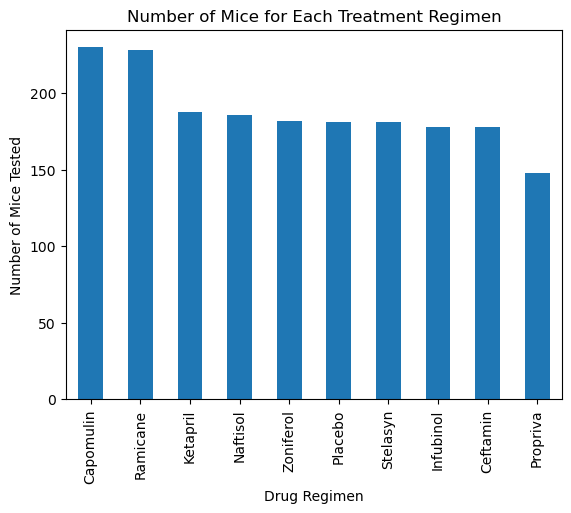

In [40]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_count = study_data['Drug Regimen'].value_counts().plot.bar(width=0.5)

mice_count.set_xlabel("Drug Regimen")
mice_count.set_ylabel("Number of Mice Tested")
mice_count.set_title("Number of Mice for Each Treatment Regimen")



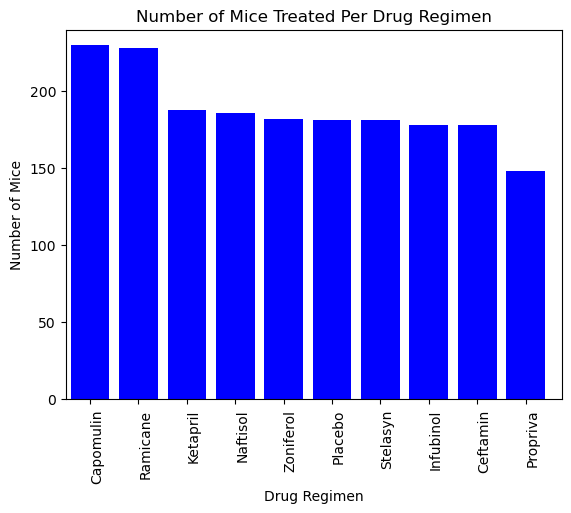

In [41]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
counts = study_data["Drug Regimen"].value_counts()
x_axis = np.arange(len(counts))
plt.bar(x_axis, counts, color="blue", align="center")
tick_loc = [value for value in x_axis]
plt.xticks(tick_loc, counts.index.values, rotation="vertical", ha="right", wrap=True)
plt.xlim(-0.5, len(x_axis)-0.25)
plt.ylim(0, max(counts) + 10)
plt.title("Number of Mice Treated Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

<Axes: title={'center': 'Distribution of Mice by Sex'}>

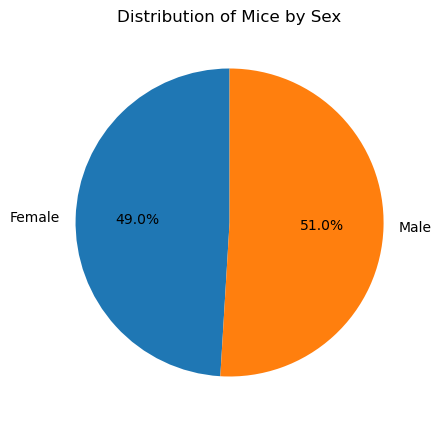

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mf_data = study_data.groupby("Sex")["Sex"].value_counts()
pie_plot=mf_data.plot.pie(autopct="%1.1f%%", startangle=90, title="Distribution of Mice by Sex", figsize=(5,5))
pie_plot.set_ylabel('')
pie_plot

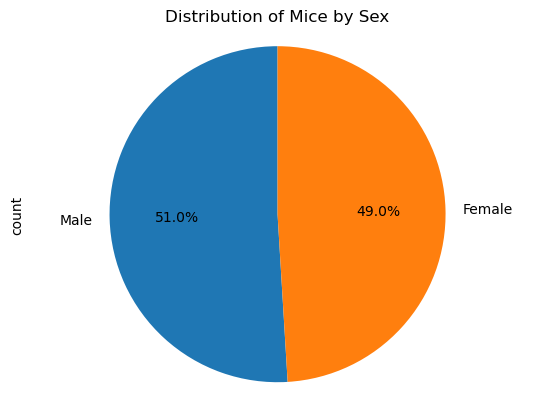

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mf_data = study_data["Sex"].value_counts()
mf_data
mf_data_pie = mf_data.plot(kind="pie", y="Sex", title = "Distribution of Mice by Sex", startangle=90, autopct="%1.1f%%")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
by_mouse = study_data.groupby(["Mouse ID"]).max()
by_mouse_reset = by_mouse.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_data = by_mouse_reset[['Mouse ID','Timepoint']].merge(study_data,on=['Mouse ID','Timepoint'],how="left")


In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


def get_outliers(treatments):
    regimen_data = merged_data.loc[merged_data["Drug Regimen"] == treatments]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{treatments}'s potential outliers:{outliers}")
    return regimen_data
    
cap = get_outliers("Capomulin")
ram = get_outliers("Ramicane")
inf = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")

# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)


    # Locate the rows which contain mice on each drug and get the tumor volumes

     # Add subset

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


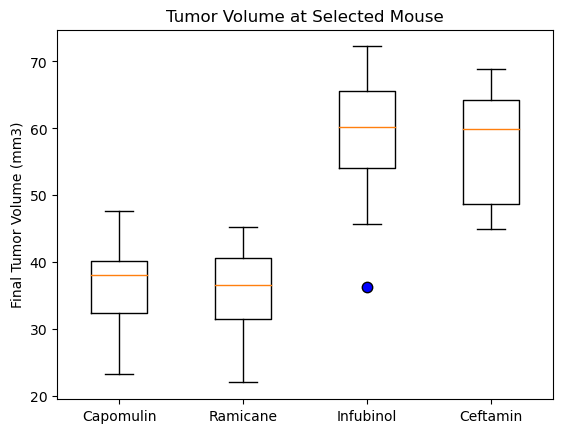

In [46]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

red_dot = dict(markerfacecolor = "blue", markersize=7.5)
plt.boxplot([cap, ram, inf, ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= red_dot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume at Selected Mouse')


plt.show()

## Line and Scatter Plots

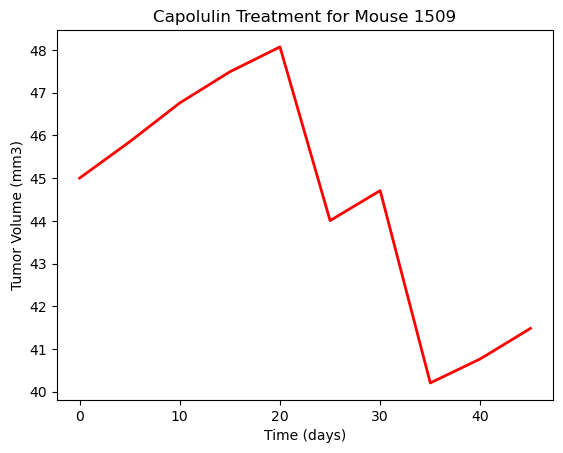

In [47]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = study_data.loc[study_data["Drug Regimen"] == "Capomulin", :]

mouse_line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509", :]
x_axis = mouse_line_df["Timepoint"]
tumor_size = mouse_line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.plot(x_axis, tumor_size, linewidth = 2, color = "red")
plt.title("Capolulin Treatment for Mouse 1509")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout
plt.show()

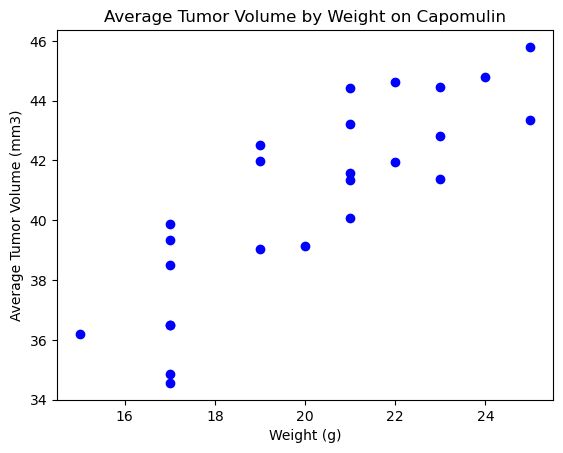

In [48]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df2 = capomulin_df.groupby(["Mouse ID"]).mean("Tumor Size")
plt.scatter(capomulin_df2['Weight (g)'], capomulin_df2['Tumor Volume (mm3)'], color="blue")

plt.title("Average Tumor Volume by Weight on Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [49]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_df2["Weight (g)"], capomulin_df2["Tumor Volume (mm3)"])
model=st.linregress(capomulin_df2['Weight (g)'],capomulin_df2['Tumor Volume (mm3)'])
model


LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


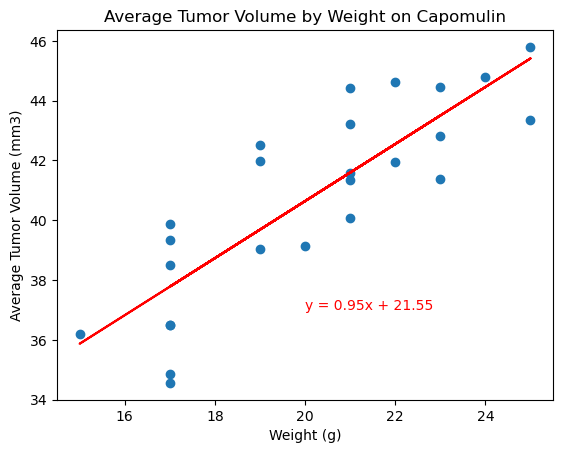

In [50]:
slope = 0.9544396890241049
intercept=21.552160532685008


x_axis = capomulin_df2['Weight (g)']
y_axis = capomulin_df2["Tumor Volume (mm3)"]
# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression

regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=10,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight on Capomulin")
plt.show()